# Cleaning and exploring the Star wars survey data set

While waiting for Star Wars: The Force Awakens to come out, the team at FiveThirtyEight became interested in answering some questions about Star Wars fans. In particular, they wondered: does the rest of America realize that “The Empire Strikes Back” is clearly the best of the bunch?

The team needed to collect data addressing this question. To do this, they surveyed Star Wars fans using the online tool SurveyMonkey. They received 835 total responses, which can be downloaded from their [GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey).

In this project, we will be cleaning and exploring the data set.

In [31]:
# Reading the data
import pandas as pd
import numpy as np

# Input file is downloaded to local directory
star_wars = pd.read_csv(r'G:\From_Laptop\Coding\DataScience\Dataquest_Projects\Star_Wars\StarWars.csv', encoding = "ISO-8859-1")

# Understanding the structure of the data
print(star_wars.head())

len(star_wars) # prints the number of rows in the database

   RespondentID Have you seen any of the 6 films in the Star Wars franchise?  \
0           NaN                                           Response             
1  3.292880e+09                                                Yes             
2  3.292880e+09                                                 No             
3  3.292765e+09                                                Yes             
4  3.292763e+09                                                Yes             

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
0                                           Response                      
1                                                Yes                      
2                                                NaN                      
3                                                 No                      
4                                                Yes                      

  Which of the following Star Wars films have you seen? Please selec

1187

# Cleaning column 'RespondentID'

After initial analysis it is understood 'RespondentID' is unique. So the rows without 'RespondentID' can be deleted.

In [32]:
star_wars = star_wars[star_wars['RespondentID'].notnull()]
len(star_wars) # prints the number of rows in the database

1186

In [33]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

# Cleaning the columns 'Have you seen...' and 'Do you consider yourself ...'

Replacing the 'Yes' and 'No' values which are in string format with boolean values 'True' and 'False' in these columns will make is easy for futher analysis

In [34]:
# print(star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].value_counts(dropna=True))

my_map = {'Yes': True, 'No': False}

star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(my_map)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(my_map)

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

  Which of the following Star Wars films have you seen? Please select all that apply.  \
1           Star Wars: Episode I  The Phantom Menace                                    
2                                                NaN                                    
3           Star Wars: Episode I  The Phantom Menace                                    
4           Star Wars: Episode I  The Phantom Menace                                    
5           Star Wars: Episode I  The Phantom Menace                                    

                                    Unnamed: 4  \
1  Star Wars: Episode II  Attack of the Clones   
2                                          NaN   
3  Star Wars: Episode II  Attack of the Clones   
4  Star Wars: Episode II  Attack of the Clones   
5  Star Wars: Episode II  Attack of the Clones   

                                    Unnamed: 5  \
1  Star Wars: Episode III  Revenge of the Sith   
2                                          NaN   
3  Star Wars: Episode III  Revenge of the Sith   
4  Star Wars: Episode III  Revenge of the Sith   
5  Star Wars: Episode III  Revenge of the Sith   

                          Unnamed: 6  \
1  Star Wars: Episode IV  A New Hope   
2                                NaN   
3                                NaN   
4  Star Wars: Episode IV  A New Hope   
5  Star Wars: Episode IV  A New Hope   

                                     Unnamed: 7  \
1  Star Wars: Episode V The Empire Strikes Back   
2                                           NaN   
3                                           NaN   
4  Star Wars: Episode V The Empire Strikes Back   
5  Star Wars: Episode V The Empire Strikes Back   

                                 Unnamed: 8  \
1  Star Wars: Episode VI Return of the Jedi   
2                                       NaN   
3                                       NaN   
4  Star Wars: Episode VI Return of the Jedi   
5  Star Wars: Episode VI Return of the Jedi   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...         Unnamed: 28       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (

# Cleaning the columns contd...
The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, Which of the following Star Wars films have you seen? Please select all that apply. The value in these columns will be replaced as below:
- If movie is watched - True
- If movie is not watched or in the column is empty - False

In [35]:
col_val_map = {
                'Star Wars: Episode I  The Phantom Menace' : True,
                'Star Wars: Episode II  Attack of the Clones' : True,
                'Star Wars: Episode III  Revenge of the Sith' : True,
                'Star Wars: Episode IV  A New Hope' : True,
                'Star Wars: Episode V The Empire Strikes Back' : True,
                'Star Wars: Episode VI Return of the Jedi' : True,
                np.nan : False
              }  

for col in star_wars.iloc[:,3:9]:
    star_wars[col] = star_wars[col].map(col_val_map)

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   Which of the following Star Wars films have you seen? Please select all that apply.  \
1                                               True                                     
2                                              False                                     
3                                               True                                     
4                                               True                                     
5                                               True                                     

   Unnamed: 4  Unnamed: 5  Unnamed: 6  Unnamed: 7  Unnamed: 8  \
1        True        True        True        True        True   
2       False       False       False       False       False   
3        True        True       False       False       False   
4        True        True        True        True        True   
5        True        True        True        True        True   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...         Unnamed: 28       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (N/A)  I don't understand this question   
4  ...      Very favorably  I don't understand this question   
5  ...  Somewhat favorably                            Greedo   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   
5                                          Yes   

  Do you consider yourself to be a fan of the Expanded Universe?æ  \
1                                                 No                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 
5                                                 No                 

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No              

# Renaming the column names
Now the corresponding column names are to be modified to make it more intuitive. Each movie (or episode) is replaced by 'seen_1', 'seen_2', etc.

In [36]:
col_name_map = {
                'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen_1',
                'Unnamed: 4' : 'seen_2', 'Unnamed: 5' : 'seen_3', 'Unnamed: 6' : 'seen_4', 'Unnamed: 7' : 'seen_5',
                'Unnamed: 8' : 'seen_6'
                }

star_wars.rename(columns=col_name_map, inplace=True)

star_wars.head()

RespondentID  Have you seen any of the 6 films in the Star Wars franchise?  \
1  3.292880e+09                                               True              
2  3.292880e+09                                              False              
3  3.292765e+09                                               True              
4  3.292763e+09                                               True              
5  3.292731e+09                                               True              

  Do you consider yourself to be a fan of the Star Wars film franchise?  \
1                                               True                      
2                                                NaN                      
3                                              False                      
4                                               True                      
5                                               True                      

   seen_1  seen_2  seen_3  seen_4  seen_5  seen_6  \
1    True    True    True    True    True    True   
2   False   False   False   False   False   False   
3    True    True    True   False   False   False   
4    True    True    True    True    True    True   
5    True    True    True    True    True    True   

  Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.  \
1                                                  3                                                                                              
2                                                NaN                                                                                              
3                                                  1                                                                                              
4                                                  5                                                                                              
5                                                  5                                                                                              

   ...         Unnamed: 28       Which character shot first?  \
1  ...      Very favorably  I don't understand this question   
2  ...                 NaN                               NaN   
3  ...    Unfamiliar (N/A)  I don't understand this question   
4  ...      Very favorably  I don't understand this question   
5  ...  Somewhat favorably                            Greedo   

  Are you familiar with the Expanded Universe?  \
1                                          Yes   
2                                          NaN   
3                                           No   
4                                           No   
5                                          Yes   

  Do you consider yourself to be a fan of the Expanded Universe?æ  \
1                                                 No                 
2                                                NaN                 
3                                                NaN                 
4                                                NaN                 
5                                                 No                 

  Do you consider yourself to be a fan of the Star Trek franchise? Gender  \
1                                                 No                 Male   
2                                                Yes                 Male   
3                                                 No                 Male   
4                                                Yes                 Male   
5                                                 No                 Male   

     Age     Household Income                         Education  \
1  18-29                  NaN                High school degree   
2  18-29         $0 - $24,999                   Bachelor degree   
3  18-29         $0 - $24,999                High school degree   
4  18-29  $100,000 - $149

# Cleaning columns contd...
The next six columns contains the rank the respondent provided for the movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN. Since the value is clean we need to convert in into numeric type.

Also we will rename their corresponding column name into a meaning full one like 'ranking_1' to 'ranking_6'

In [37]:
star_wars.iloc[:,9:15] = star_wars.iloc[:,9:15].astype(float)
# star_wars.dtypes # to check the datatype of each column
col_name_map = {
                'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.' : 'ranking_1',
                'Unnamed: 10' : 'ranking_2', 'Unnamed: 11' : 'ranking_3', 'Unnamed: 12' : 'ranking_4', 'Unnamed: 13' : 'ranking_5', 'Unnamed: 14' : 'ranking_6' 
               }

star_wars.rename(columns=col_name_map, inplace=True)

# Plot barchart of each ranking

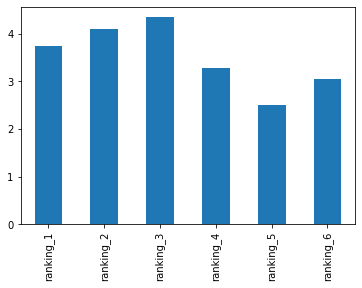

In [38]:
%matplotlib inline
star_wars.iloc[:,9:15].mean().plot.bar()

From the bargraph plotted above using the mean value of ranking we can conclude the movie with best average ranking (rank 1 is best and rank 6 is least) is 'Star Wars: Episode V The Empire Strikes Back'.
Also in general "newer movies" have better ranking than the "original movies".

# Plot barchart for most viewed movies

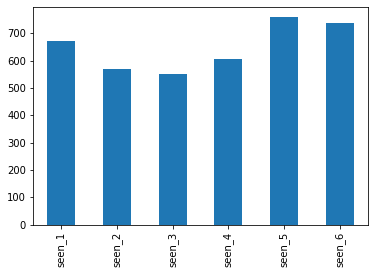

In [39]:
star_wars.iloc[:,3:9].sum().plot.bar()

From the bargraph plotted above using the sum of number of views for each movies we can conclude the movie with more viewers are for the "newer movies" compared to "original movies". This is in line with the average ranking plot. 

# Splitting the star_wars df based on gender and to plot the following graphs based on gender
- how has each gender ranked the movies
- how has each gender have watched the movies
- please note that "original movies" are from Episodes 4 to 6.
- check the link https://en.wikipedia.org/wiki/List_of_Star_Wars_films#Skywalker_saga to understand more about star_war movies

In [40]:
male = star_wars[star_wars['Gender'] == 'Male']
female = star_wars[star_wars['Gender'] == 'Female']

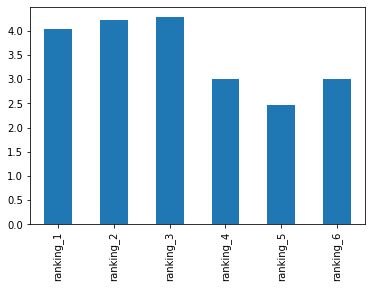

In [41]:
male.iloc[:,9:15].mean().plot.bar()

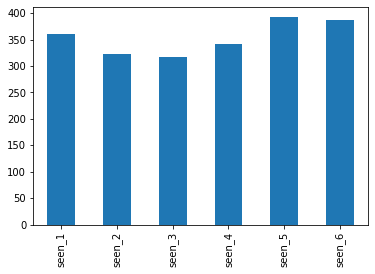

In [42]:
male.iloc[:,3:9].sum().plot.bar()

From above two barcharts for male gender we can coclude as below:
- "original movies" have better ranking than "newer movies"
- "original movies" are watched more than by "newer movies"

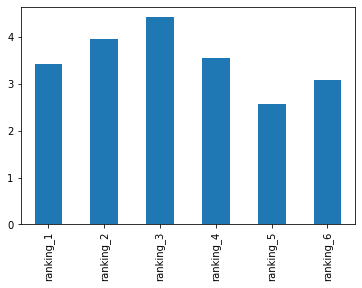

In [43]:
female.iloc[:,9:15].mean().plot.bar()

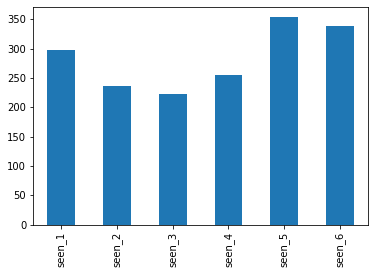

In [44]:
female.iloc[:,3:9].sum().plot.bar()

From above two barcharts for female gender we can coclude as below:

- "original movies" have better ranking than "newer movies"
- "original movies" are watched more than by "newer movies"

# Conclusion
We can determine from our analysis that the "original movies" have more viewers and also are rated higher than the "newer movies".